In [137]:
import tensorflow as tf 
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np
import seaborn as sns

In [135]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 3s 0us/step


In [39]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

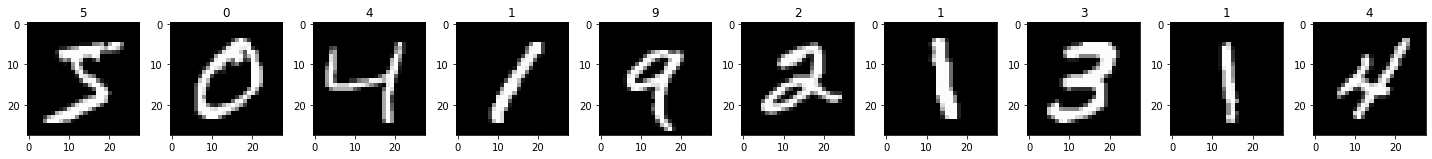

In [40]:
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(20,6), tight_layout=True)

for i in range(10):
  ax[i].imshow(x_train[i], cmap='gray')
  ax[i].set_title(y_train[i])

In [41]:
x_train = x_train.reshape(-1, 28*28) / 255.
x_test = x_test.reshape(-1, 28*28) / 255. 

In [12]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [13]:
latent_dim = 2

In [88]:
img_shape = (x_train.shape[1], x_train.shape[2])

In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=512, activation='relu', input_dim=28*28),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='linear', name='encoded'),

    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=28*28, activation='linear', name='decoded')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 encoded (Dense)             (None, 2)                 258       
                                                                 
 dense_2 (Dense)             (None, 128)               384       
                                                                 
 dense_3 (Dense)             (None, 512)               66048     
                                                                 
 decoded (Dense)             (None, 784)               402192    
                                                                 
Total params: 936,466
Trainable params: 936,466
Non-trai

In [16]:
model.compile(optimizer='adam', loss='mse')

In [17]:
history = model.fit(x_train, x_train, batch_size=128, epochs=30, verbose=1, validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 3s 7ms/step - loss: 0.0538 - val_loss: 0.0477
Epoch 2/30
375/375 [==============================] - 2s 6ms/step - loss: 0.0461 - val_loss: 0.0445
Epoch 3/30
375/375 [==============================] - 2s 6ms/step - loss: 0.0437 - val_loss: 0.0426
Epoch 4/30
375/375 [==============================] - 2s 6ms/step - loss: 0.0422 - val_loss: 0.0413
Epoch 5/30
375/375 [==============================] - 2s 6ms/step - loss: 0.0410 - val_loss: 0.0406
Epoch 6/30
375/375 [==============================] - 2s 6ms/step - loss: 0.0401 - val_loss: 0.0397
Epoch 7/30
375/375 [==============================] - 2s 6ms/step - loss: 0.0395 - val_loss: 0.0391
Epoch 8/30
375/375 [==============================] - 2s 6ms/step - loss: 0.0389 - val_loss: 0.0387
Epoch 9/30
375/375 [==============================] - 2s 6ms/step - loss: 0.0383 - val_loss: 0.0382
Epoch 10/30
375/375 [==============================] - 2s 6ms/step - loss: 0.0380 - val_loss: 0.0380

Text(0.5, 0, 'Epochs')

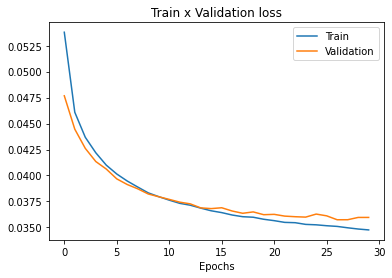

In [30]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss)
plt.plot(val_loss)
plt.legend(['Train', 'Validation'])
plt.title('Train x Validation loss')
plt.xlabel('Epochs')

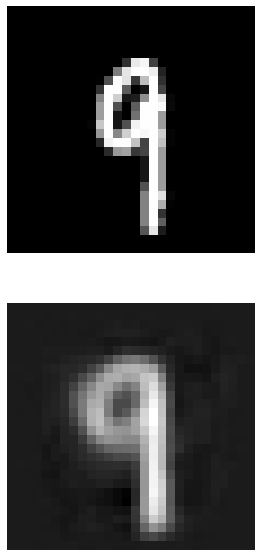

In [35]:
n_imgs = 1
random_imgs = np.random.choice(range(x_test.shape[1]), size=n_imgs)
img_true = x_test[random_imgs]
img_pred = model.predict(img_true)

plt.figure(figsize=(20, 10))
for i in range(n_imgs):
  plt.subplot(2, n_imgs, i + 1)
  plt.imshow(img_true[i].reshape(28, 28), cmap='gray')
  plt.axis('off')

  plt.subplot(2, n_imgs, i + 1 + n_imgs)
  plt.imshow(img_pred[i].reshape(28, 28), cmap='gray')
  plt.axis('off')

In [24]:
encoder = tf.keras.models.Model(inputs=model.input, outputs=model.get_layer(name='encoded').output)
x_test_encoded = encoder.predict(x_test)

In [25]:
x_test_encoded.shape

(10000, 2)

In [42]:
x_test_encoded

array([[-5.539259  , -5.125949  ],
       [-2.5004354 ,  1.3544277 ],
       [ 0.9797889 , -1.3087075 ],
       ...,
       [-1.6157284 , -1.8986428 ],
       [ 0.71055603,  0.14709406],
       [-8.33096   , -0.30519715]], dtype=float32)

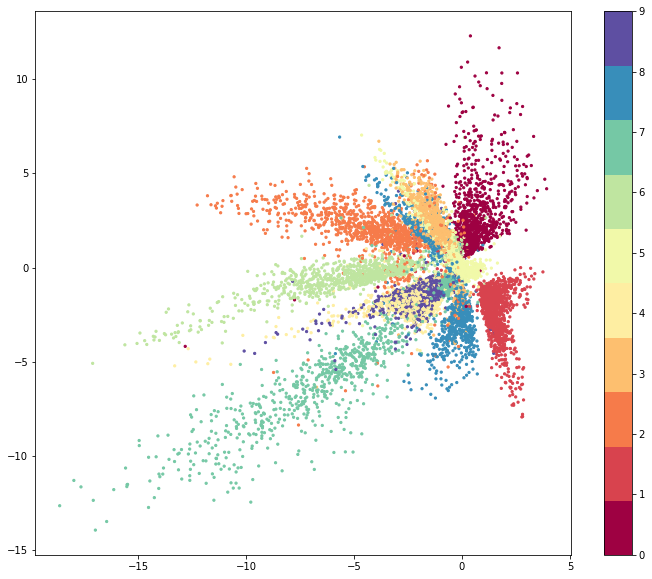

In [31]:
plt.figure(figsize=(12,10))
plt.scatter(x_test_encoded[:, 0], x_test_encoded[:, 1], c=y_test, cmap=plt.cm.get_cmap(name='Spectral', lut=10), s=5)
plt.colorbar()